# **Zoo database**

https://archive.ics.uci.edu/dataset/111/zoo

A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)

1. Title: Zoo database

2. Source Information
   -- Creator: Richard Forsyth
   -- Donor: Richard S. Forsyth
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- A simple database containing 17 Boolean-valued attributes.  The "type"
      attribute appears to be the class attribute.  Here is a breakdown of
      which animals are in which type: (I find it unusual that there are
      2 instances of "frog" and one of "girl"!)

      Class# Set of animals:
      ====== ===============================================================
           1 (41) aardvark, antelope, bear, boar, buffalo, calf,
                  cavy, cheetah, deer, dolphin, elephant,
                  fruitbat, giraffe, girl, goat, gorilla, hamster,
                  hare, leopard, lion, lynx, mink, mole, mongoose,
                  opossum, oryx, platypus, polecat, pony,
                  porpoise, puma, pussycat, raccoon, reindeer,
                  seal, sealion, squirrel, vampire, vole, wallaby,wolf
           2 (20) chicken, crow, dove, duck, flamingo, gull, hawk,
                  kiwi, lark, ostrich, parakeet, penguin, pheasant,
                  rhea, skimmer, skua, sparrow, swan, vulture, wren
           3 (5)  pitviper, seasnake, slowworm, tortoise, tuatara
           4 (13) bass, carp, catfish, chub, dogfish, haddock,
                  herring, pike, piranha, seahorse, sole, stingray, tuna
           5 (4)  frog, frog, newt, toad
           6 (8)  flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
           7 (10) clam, crab, crayfish, lobster, octopus,
                  scorpion, seawasp, slug, starfish, worm

5. Number of Instances: 101

6. Number of Attributes: 18 (animal name, 15 Boolean attributes, 2 numerics)

7. Attribute Information: (name of attribute and type of value domain)
   1. animal name:      Unique for each instance
   2. hair		Boolean
   3. feathers		Boolean
   4. eggs		Boolean
   5. milk		Boolean
   6. airborne		Boolean
   7. aquatic		Boolean
   8. predator		Boolean
   9. toothed		Boolean
  10. backbone		Boolean
  11. breathes		Boolean
  12. venomous		Boolean
  13. fins		Boolean
  14. legs		Numeric (set of values: {0,2,4,5,6,8})
  15. tail		Boolean
  16. domestic		Boolean
  17. catsize		Boolean
  18. type		Numeric (integer values in range [1,7])

8. Missing Attribute Values: None

9. Class Distribution: Given above
   


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# Get the Data

get zoo data using pandas dataframe

In [2]:
df = pd.read_csv('zoo.data')
df.head()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(100, 18)

In [4]:
attrs = ['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

df.columns = attrs

In [5]:
df.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      100 non-null    object
 1   hair      100 non-null    int64 
 2   feathers  100 non-null    int64 
 3   eggs      100 non-null    int64 
 4   milk      100 non-null    int64 
 5   airborne  100 non-null    int64 
 6   aquatic   100 non-null    int64 
 7   predator  100 non-null    int64 
 8   toothed   100 non-null    int64 
 9   backbone  100 non-null    int64 
 10  breathes  100 non-null    int64 
 11  venomous  100 non-null    int64 
 12  fins      100 non-null    int64 
 13  legs      100 non-null    int64 
 14  tail      100 non-null    int64 
 15  domestic  100 non-null    int64 
 16  catsize   100 non-null    int64 
 17  type      100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.420000,0.200000,0.590000,0.400000,0.240000,0.360000,0.55,0.600000,0.820000,0.79000,0.08000,0.170000,2.830000,0.750000,0.130000,0.43000,2.850000
std,0.496045,0.402015,0.494311,0.492366,0.429235,0.482418,0.50,0.492366,0.386123,0.40936,0.27266,0.377525,2.040276,0.435194,0.337998,0.49757,2.105188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.00000,0.000000,2.000000,0.750000,0.000000,0.00000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,3.000000,1.000000,0.000000,0.00000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.000000,1.000000,0.000000,1.00000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.00000,1.000000,8.000000,1.000000,1.000000,1.00000,7.000000


# **Explore Data**

## Missing Data

In [8]:
df.isnull().sum()

name        0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [9]:
df.isna().sum()

name        0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [10]:
df['name'].unique()

array(['antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp',
       'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab',
       'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck',
       'elephant', 'flamingo', 'flea', 'frog', 'fruitbat', 'giraffe',
       'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster',
       'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi',
       'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink',
       'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx',
       'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha',
       'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma',
       'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse',
       'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua',
       'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish',
       'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara',
       '

<Axes: >

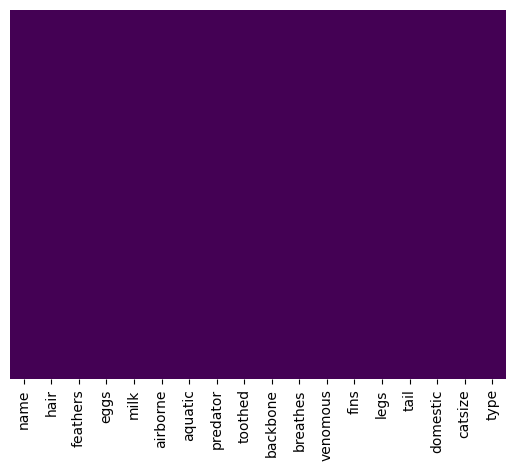

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df['type'].value_counts()

type
1    40
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [13]:
duplicates = df['name'].value_counts()
duplicates[duplicates > 1]

name
frog    2
Name: count, dtype: int64

In [14]:
df[df['name' ] == 'frog']

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
24,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
25,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [ ]:
# df['name'][(df['name'] == 'frog') & (df['venomous'] == 1)] = 'frog_venomous'

In [15]:
types = {1: 'Mammal', 2: 'Bird', 3: 'Reptile', 4: 'Fish', 5: 'Amphibian', 6: 'Bug', 7: 'Invertebrate'}

df['type_name'] = df['type'].map(types)
df.drop(['name'], axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,type_name
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal


## Visulaization of Data

<Axes: xlabel='type_name', ylabel='count'>

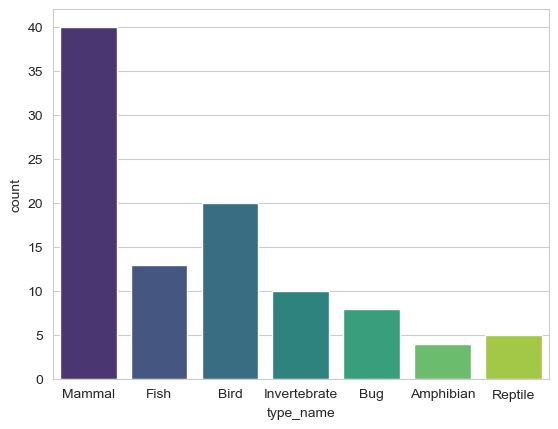

In [16]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='type_name', palette='viridis')

<Axes: xlabel='type_name', ylabel='count'>

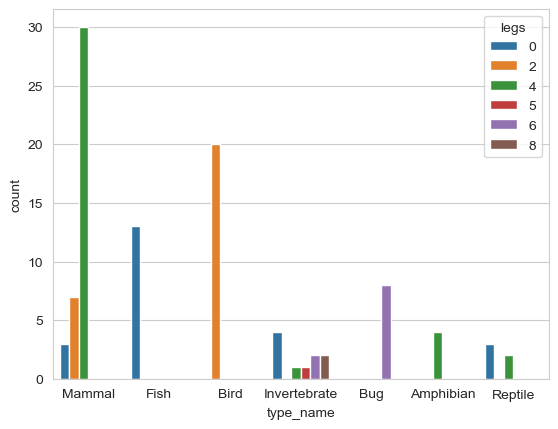

In [17]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='type_name', hue='legs')

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Mammal'

<Figure size 1000x800 with 0 Axes>

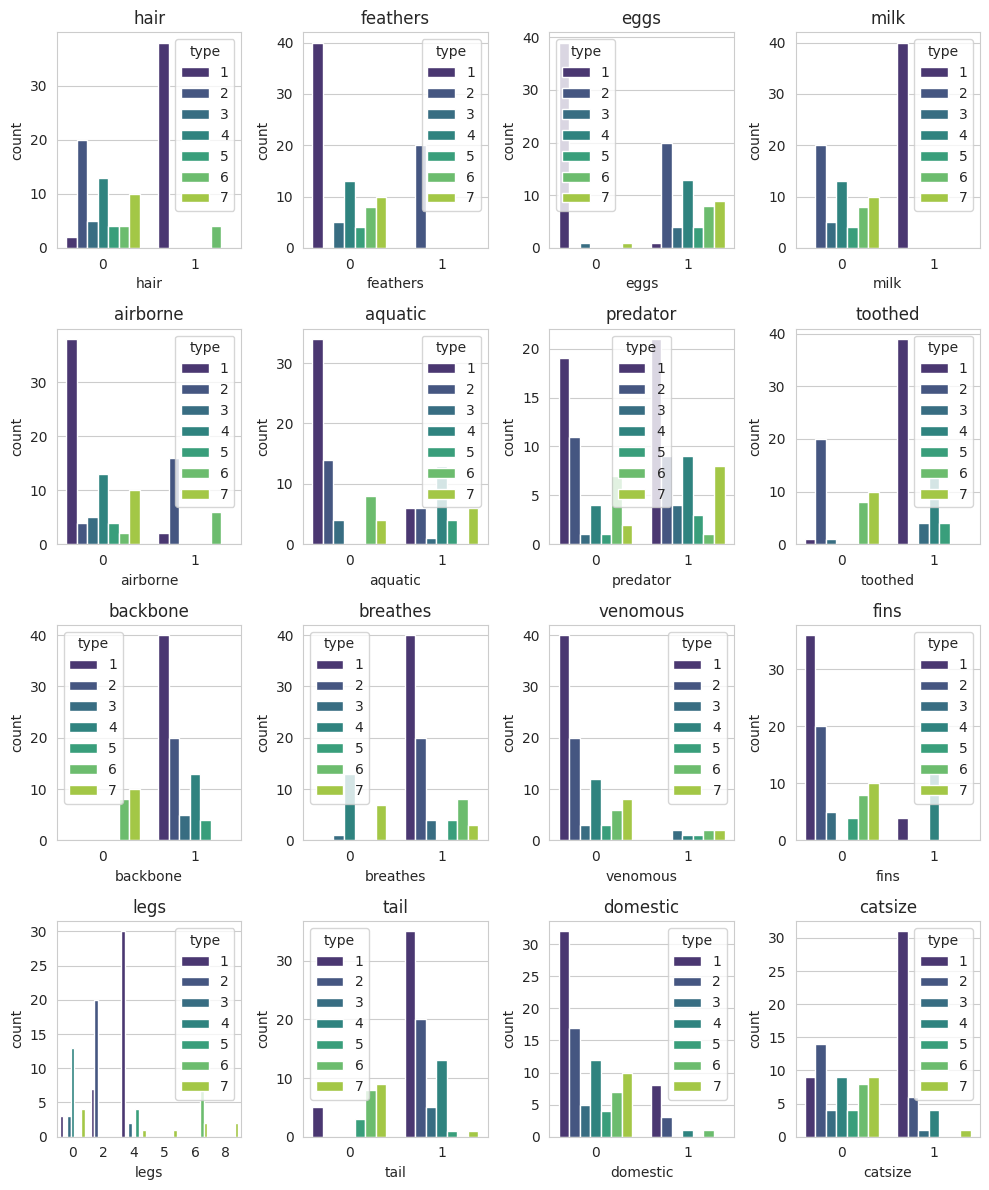

In [19]:
plt.figure(figsize=[10,12])

features = list(df.drop(['type', 'type_name'], axis=1))
n = 1
for f in features:
  plt.subplot(4, 4, n)
  sns.countplot(data=df, x=f, palette='viridis', hue='type')
  plt.title(f)
  n += 1

plt.tight_layout()

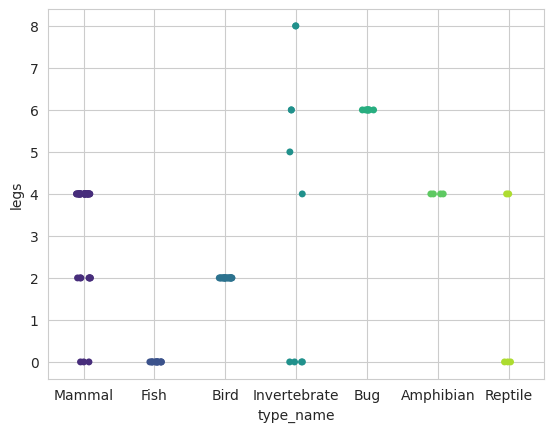

In [20]:
sns.stripplot(x="type_name", y="legs", data=df, palette='viridis')
plt.grid(True)

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['type', 'type_name'], axis=1)
y = df['type']

Splitting imbalanced dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((80, 16), (80,)), ((20, 16), (20,)))

In [39]:
y_train.value_counts()

1    29
2    18
4    12
7     9
6     6
5     3
3     3
Name: type, dtype: int64

# **Model Selection**

In [25]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'LogReg': LogisticRegression(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier()
}

def models_pred(X, y):
  # split the data
  xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2)

  model_list = []

  for name, model in models.items():
    model.fit(xtr, ytr)
    pred = model.predict(xte)

    pred_res = {
      'model': name,
      'accuracy': accuracy_score(yte, pred),
      'precision':precision_score(yte, pred, average='macro'),
      'recall':recall_score(yte, pred, average='macro'),
      'f1-score':f1_score(yte, pred, average='macro')
    }
    model_list.append(pred_res)

  return pd.DataFrame(model_list)


#### Imbalanced Dataset

###### Without Scaler

In [40]:
models_pred(X, y)

,model,accuracy,precision,recall,f1-score
0,KNN,1.0,1.000000,1.000000,1.000000
1,LogReg,0.9,0.888889,0.916667,0.861111
2,SVM,1.0,1.000000,1.000000,1.000000
3,DecisionTree,0.9,0.888889,0.916667,0.861111


###### With Scaler

In [41]:
sc = StandardScaler()
X_s = sc.fit_transform(X)

models_pred(X_s, y)

,model,accuracy,precision,recall,f1-score
0,KNN,1.0,1.0,1.0,1.0
1,LogReg,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,DecisionTree,1.0,1.0,1.0,1.0


In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [ ]:
# X_train.shape, y_train.shape

((20, 16), (20,))

#### Balance Dataset using SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X,y)
y_resampled.value_counts()

1    40
4    40
2    40
7    40
6    40
5    40
3    40
Name: type, dtype: int64

##### without scaler

In [43]:
models_pred(X_resampled, y_resampled)

,model,accuracy,precision,recall,f1-score
0,KNN,1.000000,1.000000,1.000000,1.000000
1,LogReg,0.982143,0.976190,0.987013,0.980210
2,SVM,1.000000,1.000000,1.000000,1.000000
3,DecisionTree,0.964286,0.959524,0.957143,0.957699


In [45]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_resampled, y_resampled, train_size=0.2)

##### with scaler

In [44]:
scaler_s = StandardScaler()
X_scaled_re = scaler_s.fit_transform(X_resampled)

models_pred(X_scaled_re, y_resampled)

,model,accuracy,precision,recall,f1-score
0,KNN,0.964286,0.968254,0.971429,0.967105
1,LogReg,1.000000,1.000000,1.000000,1.000000
2,SVM,0.982143,0.982143,0.985714,0.982957
3,DecisionTree,1.000000,1.000000,1.000000,1.000000


In [ ]:
# X_strain_scaled, X_stest_scaled, y_strain_scaled, y_stest_scaled = train_test_split(X_scaled_re, y_resampled, train_size=0.2)

In [46]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_scaled_re, y_resampled, train_size=0.2)

## **KNN**

### Predictions and Evaluation

### Choosing K-value

In [48]:
def k_value(X_train, X_test, y_train, y_test):
  error_rate = []
  scores = []

  for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())
  return scores, error_rate

In [49]:
scores, error_rate = k_value(X_train, X_test, y_train, y_test) # scaled imbalanced

sscores, serror_rate = k_value(X_strain, X_stest, y_strain, y_stest) # non scaled balanced

Text(0, 0.5, 'Error Rate')

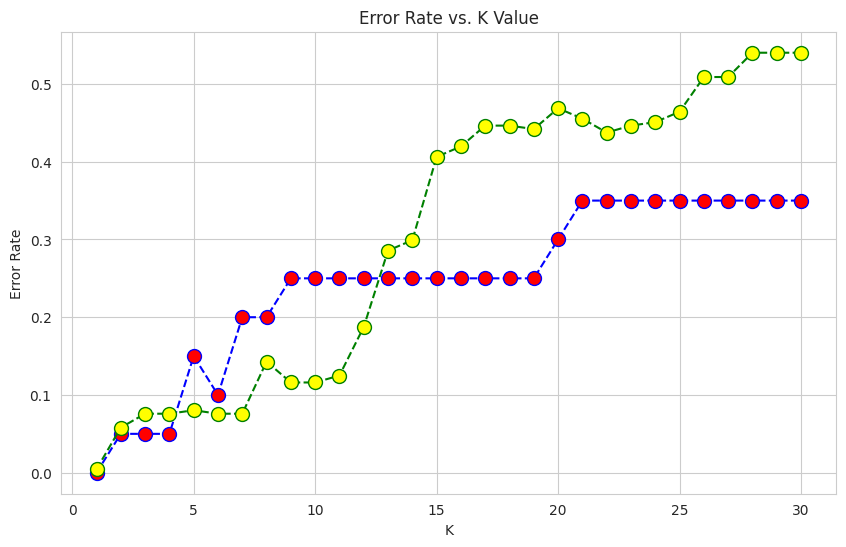

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,31),serror_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuray')

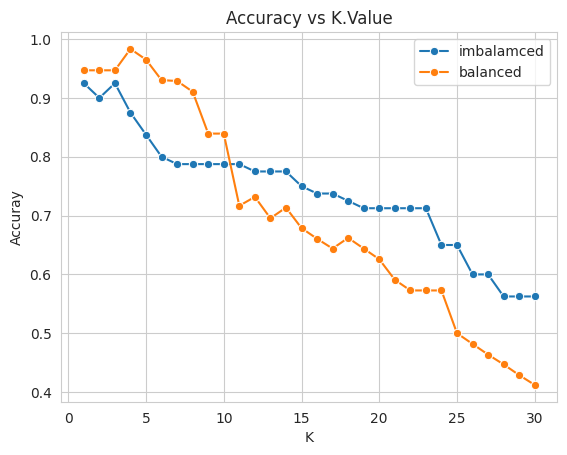

In [51]:
sns.lineplot(x = range(1, 31), y = scores, marker = 'o', label='imbalamced')

sns.lineplot(x = range(1, 31), y = sscores, marker = 'o', label='balanced')
plt.title('Accuracy vs K.Value')
plt.xlabel('K')
plt.ylabel('Accuray')

In [52]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_strain, y_strain)

knn_pred = knn1.predict(X_test)
knn_spred = knn2.predict(X_stest)

<Axes: >

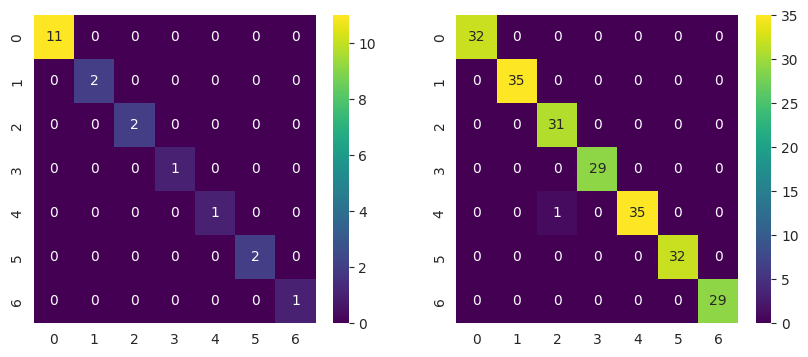

In [53]:
fig, ax = plt.subplots(1, 2, figsize=[10, 4]
                       )
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True, cmap='viridis', ax=ax[0])
sns.heatmap(confusion_matrix(y_stest, knn_spred), annot=True, cmap='viridis', ax=ax[1])

In [54]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [55]:
print(classification_report(y_stest, knn_spred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.98        31
           4       1.00      1.00      1.00        29
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        29

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



## **Logistic Regression**

### GridSearch

In [56]:
logreg = LogisticRegression()

logreg_params = {"C":np.logspace(-7, 7), "penalty":["l1","l2"]}

# Imbalanced Class
logreg_grid = GridSearchCV(logreg, logreg_params, cv=3)
logreg_grid.fit(X_train, y_train)
logreg_pred = logreg_grid.predict(X_test)

# Balanced Class
logreg_grid2 = GridSearchCV(logreg, logreg_params, cv=3)
logreg_grid2.fit(X_strain, y_strain)
logreg_pred2 = logreg_grid.predict(X_stest)

In [57]:
logreg_grid.best_params_, logreg_grid2.best_params_

({'C': 193069.77288832457, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l2'})

<Axes: >

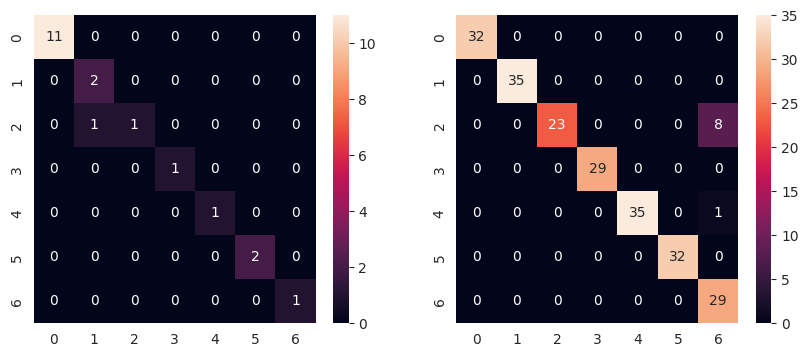

In [58]:
fig, ax =plt.subplots(1,2, figsize=[10, 4])

sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, ax=ax[0]) # imbalanced
sns.heatmap(confusion_matrix(y_stest, logreg_pred2), annot=True, ax=ax[1]) # balanced

In [59]:
print(classification_report(y_test,logreg_pred), classification_report(y_stest,logreg_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.95      0.93      0.92        20
weighted avg       0.97      0.95      0.95        20
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        35
           3       1.00      0.74      0.85        31
           4       1.00      1.00      1.00        29
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        32
           7       0.76 

## **SVM**

### Predictions and Evaluations

### Find parameters using GridSearch

In [60]:
svm_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

# Imbalanced dataset
svm_grid = GridSearchCV(SVC(), svm_param_grid)
svm_grid.fit(X_train,y_train)
svm_pred = svm_grid.predict(X_test)

# Balanced dataset
svm_grid2 = GridSearchCV(SVC(), svm_param_grid)
svm_grid2.fit(X_strain,y_strain)
svm_pred2 = svm_grid2.predict(X_stest)


In [61]:
svm_grid.best_params_, svm_grid2.best_params_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'})

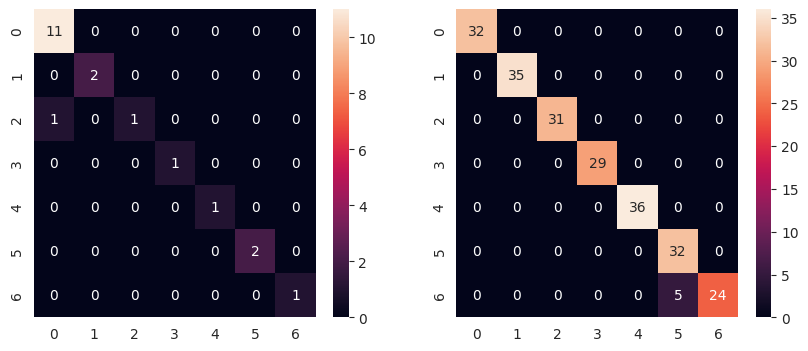

In [62]:
fig, ax =plt.subplots(1,2, figsize=[10, 4])

sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, ax=ax[0])
sns.heatmap(confusion_matrix(y_stest, svm_pred2), annot=True, ax=ax[1])

plt.show()

In [63]:
print(classification_report(y_test,svm_pred), classification_report(y_stest,svm_pred2))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.99      0.93      0.95        20
weighted avg       0.95      0.95      0.94        20
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        36
           6       0.86      1.00      0.93        32
           7       1.00 

## **Decision Trees**

In [64]:
def dtree_grid_search(X,y,nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 31)}
    dtree_model=DecisionTreeClassifier()

    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)
    return dtree_gscv

def dtree_gini(X_train, X_test, y_train, y_test, label):
  # scores = []
  train_scores = []
  test_scores = []

  for depth in range(1, 31):
    dtree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dtree_model.fit(X_train, y_train)

    train_pred = dtree_model.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_pred))

    test_pred = dtree_model.predict(X_test)
    test_scores.append(accuracy_score(y_test, test_pred))

  sns.lineplot(x=range(1, 31), y=train_scores, label=f'train {label}')
  sns.lineplot(x=range(1,31), y=test_scores, label=f'test {label}')
  plt.title('Accuracy vs max_depth')
  plt.xlabel('Depth')
  plt.ylabel('Accuracy')
  plt.grid(True)

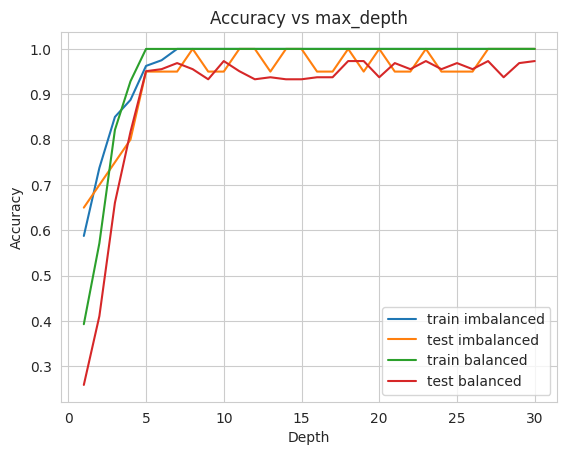

In [65]:
dtree_gini(X_train, X_test, y_train, y_test, 'imbalanced')
dtree_gini(X_strain, X_stest, y_strain, y_stest, 'balanced')

In [66]:
# imbalanced
dtree = dtree_grid_search(X_train, y_train, 3)
dtree_pred = dtree.predict(X_test)

# balanced
dtree2 = dtree_grid_search(X_strain, y_strain, 5)
dtree_pred2 = dtree2.predict(X_stest)

In [67]:
dtree.best_estimator_, dtree2.best_estimator_

(DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(criterion='entropy', max_depth=5))

### Prediction and Evaluation

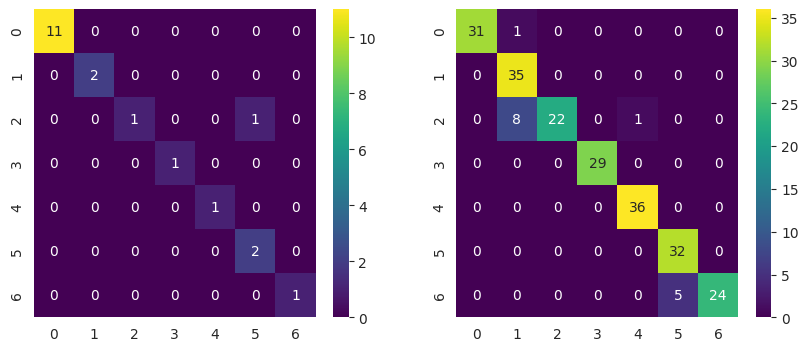

In [68]:
fig, ax =plt.subplots(1,2, figsize=[10, 4])

sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0], cmap='viridis')
sns.heatmap(confusion_matrix(y_stest, dtree_pred2), annot=True, ax=ax[1], cmap='viridis')

plt.show()

In [69]:
print(classification_report(y_test,dtree_pred), classification_report(y_stest,dtree_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.95      0.93      0.92        20
weighted avg       0.97      0.95      0.95        20
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        32
           2       0.80      1.00      0.89        35
           3       1.00      0.71      0.83        31
           4       1.00      1.00      1.00        29
           5       0.97      1.00      0.99        36
           6       0.86      1.00      0.93        32
           7       1.00 

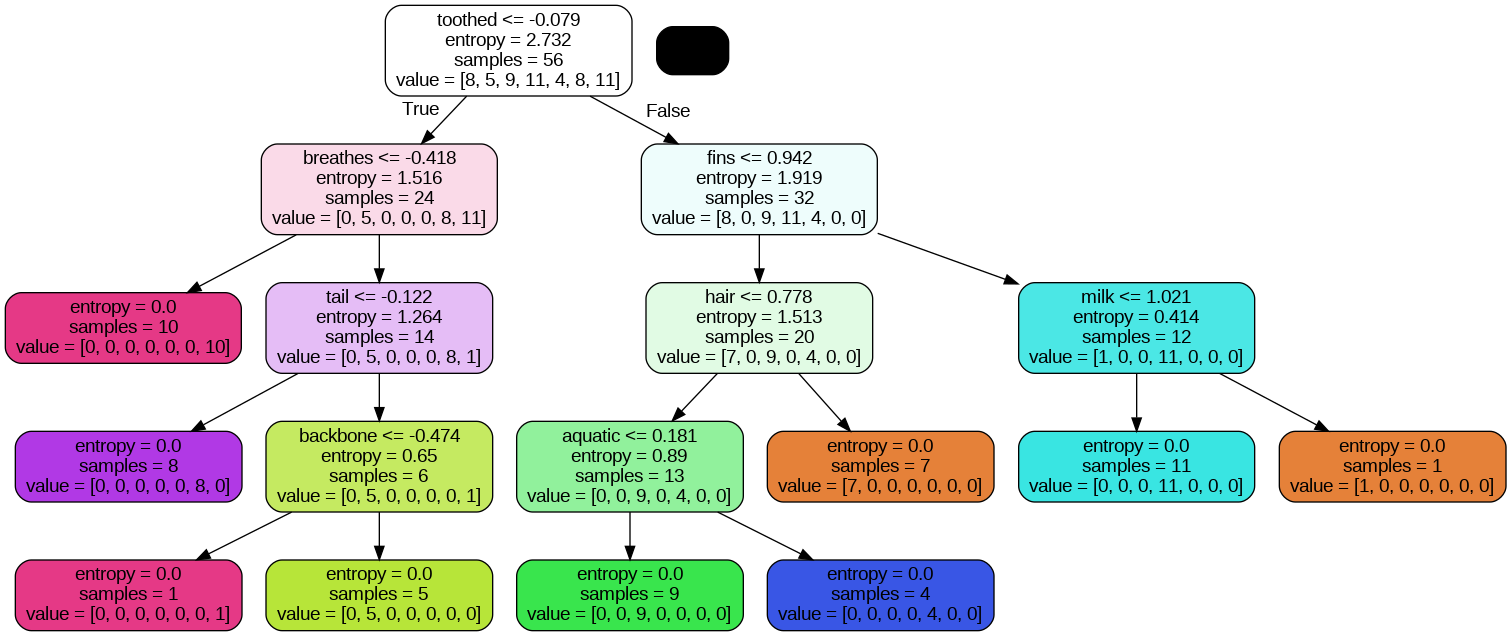

In [70]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

features = list(X)

dot_data = tree.export_graphviz(
                    dtree2.best_estimator_,
                    out_file=None,
                    feature_names=features,
                    filled=True,
                    rounded=True
    )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

## Ensemble

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': range(1, 31)
}
rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(rfc, param_grid=param_grid, cv=3)
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': [10, 50, 100]})

In [72]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=4)

<Axes: >

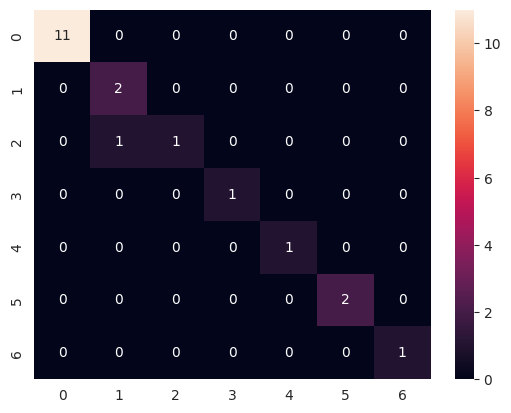

In [73]:
rfc_pred = rfc_grid.predict(X_test)

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True)

#### Feature Importance

In [74]:
feature_list = []
for name, score in zip(X, rfc_grid.best_estimator_.feature_importances_):
  feature_list.append({
      'name': name,
      'score': score
  })

pd.DataFrame(feature_list).sort_values(by=['score'], ascending=False)


,name,score
3,milk,0.177003
1,feathers,0.147399
2,eggs,0.109534
12,legs,0.087502
0,hair,0.085678
7,toothed,0.074707
11,fins,0.070793
8,backbone,0.063584
9,breathes,0.061701
13,tail,0.042873


### Voting

#### Hard Voting

In [75]:
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_hard_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],voting='hard')

voting_hard_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('knn', KNeighborsClassifier())])

#### Soft Voting

In [76]:
knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_soft_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],voting='soft')

voting_soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

### AdaBoosting

SAMME - Stagewise Additive Modeling using Multiclass Exponental loss function

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### GradientBoosting

#### Grid Search

## Final Results

In [78]:
def model_results(name, model, X_train, X_test, y_train, y_test):
  pred = model.predict(X_test)

  return {
    'Model': name,
    'Accuracy': accuracy_score(y_test, pred),
    'Precision': precision_score(y_test, pred, average='macro'),
    'Recall': recall_score(y_test, pred, average='macro'),
    'F1-score': f1_score(y_test, pred, average='macro')
}

In [79]:
models = {
    'KNN': knn1,
    'LogReg': logreg_grid,
    'SVM': svm_grid,
    'DecisionTree': dtree,
    'RandomForest': rfc_grid,
    'HardVoting': voting_hard_clf,
    'SoftVoting': voting_soft_clf,
    'AdaBoosting': ada_clf
}

final = []

for name, model in models.items():
  res = model_results(name, model, X_train, X_test, y_train, y_test)
  final.append(res)

pdfinal = pd.DataFrame(final)

In [80]:
pdfinal

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,1.00,1.000000,1.000000,1.000000
1,LogReg,0.95,0.952381,0.928571,0.923810
2,SVM,0.95,0.988095,0.928571,0.946170
3,DecisionTree,0.95,0.952381,0.928571,0.923810
4,RandomForest,0.95,0.952381,0.928571,0.923810
5,HardVoting,0.95,0.988095,0.928571,0.946170
6,SoftVoting,0.95,0.928571,0.928571,0.904762
7,AdaBoosting,0.85,0.750000,0.785714,0.723810


## PCA

In [81]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)

principal_Df = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])

principal_Df.head()

,pc1,pc2
0,1.315846,-1.228750
1,-3.117216,0.257531
2,1.356705,-1.061704
3,1.284887,-1.238903
4,1.315846,-1.228750


In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca2 = PCA(n_components = 2)
principal_components2 = pca.fit_transform(X_scaled)

principal_Df2 = pd.DataFrame(data = principal_components2, columns = ['pc1', 'pc2'])

principal_Df2.head()

,pc1,pc2
0,-2.907632,-0.422383
1,1.703831,3.702622
2,-2.509695,-0.282870
3,-2.837052,0.090033
4,-2.907632,-0.422383


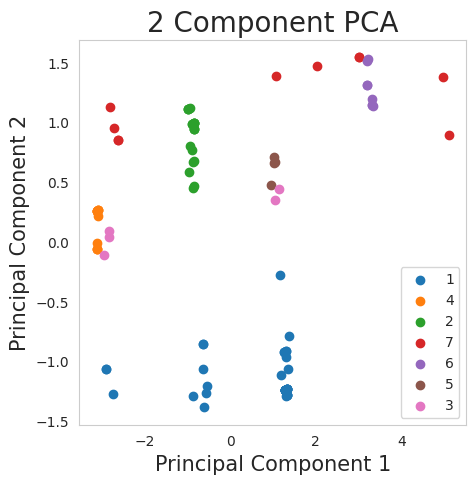

In [83]:
final_df = pd.concat([principal_Df, y], axis=1)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)
targets = y.unique()
for target in targets:
  ax.scatter(x=final_df.loc[final_df['type'] == target, 'pc1'], y=final_df.loc[final_df['type'] == target, 'pc2'])
ax.legend(targets, loc=4)
ax.grid()

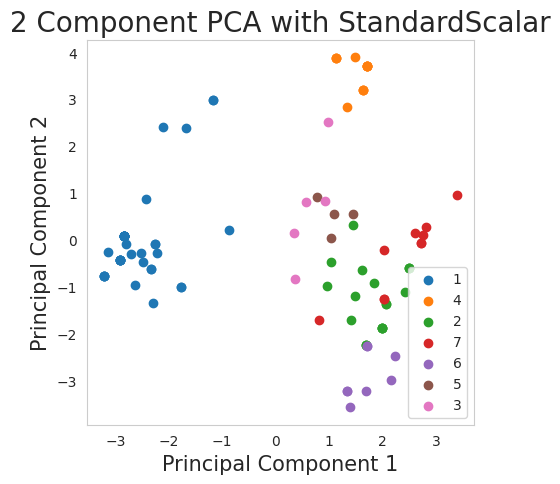

In [84]:
final_df2 = pd.concat([principal_Df2, y], axis=1)
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_xlabel('Principal Component 1', fontsize=15)
ax2.set_ylabel('Principal Component 2', fontsize=15)
ax2.set_title('2 Component PCA with StandardScalar',fontsize=20)
targets2 = y.unique()
for target in targets2:
  ax2.scatter(x=final_df2.loc[final_df2['type'] == target, 'pc1'], y=final_df2.loc[final_df2['type'] == target, 'pc2'])
ax2.legend(targets2, loc=4)
ax2.grid()

#### Models with PCA

In [85]:
def pca_model_results(name, model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  return {
    'Model': name,
    'Accuracy': accuracy_score(y_test, pred),
    'Precision': precision_score(y_test, pred, average='macro'),
    'Recall': recall_score(y_test, pred, average='macro'),
    'F1-score': f1_score(y_test, pred, average='macro')
}

In [86]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(principal_components, y, train_size=0.2)

In [87]:
pca_models = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'LogReg': LogisticRegression(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

pca_final = []

for name, model in pca_models.items():
  res = pca_model_results(name, model, X_pca_train, X_pca_test, y_pca_train, y_pca_test)
  pca_final.append(res)

pca_pdfinal = pd.DataFrame(pca_final)

In [88]:
pca_pdfinal

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.8625,0.599686,0.673469,0.614700
1,LogReg,0.7625,0.380020,0.500000,0.426775
2,SVM,0.7500,0.394238,0.495918,0.428269
3,DecisionTree,0.8625,0.601190,0.686395,0.627862
4,RandomForest,0.8000,0.541296,0.561224,0.525961


In [89]:
pdfinal

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,1.00,1.000000,1.000000,1.000000
1,LogReg,0.95,0.952381,0.928571,0.923810
2,SVM,0.95,0.988095,0.928571,0.946170
3,DecisionTree,0.95,0.952381,0.928571,0.923810
4,RandomForest,0.95,0.952381,0.928571,0.923810
5,HardVoting,0.95,0.988095,0.928571,0.946170
6,SoftVoting,0.95,0.928571,0.928571,0.904762
7,AdaBoosting,0.85,0.750000,0.785714,0.723810
